<h2>Notes -- Image Processing with Python: Coordinates and Colors</h2>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [What is Image Processing](#ImgProc)<br>
   [1.1 What is an Image](#Img)<br>
2. [Coordinate System](#Coordinate)<br>
   [2.1 Cartesian Coordinates](#Cartesian)<br>
   [2.2 Python Image Coordinate Systems](#PythonCoord)<br>
   [2.3 Exploring the Coordinate System with Python Image Processing Libraries](#Libraries)<br>
3. [Color Models](#Color)<br>
   [3.1 skimage and cv2 Color Models](#LibColor)<br>
   [3.2 Displaying the Color Channels](#DispColorChannels)<br>
   [3.3 Combining Color Channels](#CombColorChannels)<br>
   [3.4 Converting RGB (color) Images to Grayscale Images](#GrayScale)<br>
   [3.5 Converting Color or Grayscale Images to Black and White (binary)](#BW)<br>
   [3.6 Inverting from Black on White to White on Black](#Invert)<br>
4. [Saving and Image to Disk](#ImgDisk)<br>

In [1]:
# enable all interactive output to be 'printed'
# and disable scrolling so long output can be displayed w/o scroll bars

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<a class="anchor" id="ImgProc"></a>
<h3>1. What is Image Processing</h3>
<a href='#toc'>Return to TOC</a>

In image processing computer algorithms and code are used to manipulate, analyze and interpret <i>digital</i> images. The goal of this processing is usually multifold and can include the storage, representation, information extraction, enhancement, restoration and interpretation of the images being processed.

<a class="anchor" id="Img"></a>
<h4>1.1 What is an Image?</h4>
<a href='#toc'>Return to TOC</a>

The images in image processing are "numeric abstractions or approximate representations of what we see with our eyes in the real world." Before considering how to process these representations with various Python libraries, algorithms and programs, we need to understand the structure and details of these representations.

Take, for example, the following image of a lion taken with a digital camera.

Figure 1. Lion


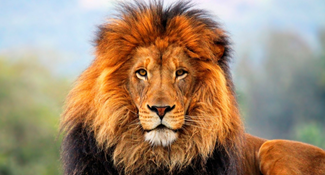

In [3]:
print("Figure 1. Lion")
from IPython.display import Image, display
display(Image(filename='images/lion.png', embed=True))

While the image of the lion appears to be 'solid and continuous,' it actually consists of a series of small dots  arranged in a grid of rows and columns. The grid is more easily seen by zooming in on a small segment of the image. This is done in Figure 2 which provides a magnified view of the lion's right eye. Looking at this figure, you'll notice that the dots are individual squares, each with a single color.

Figure 2. Lion's Eye


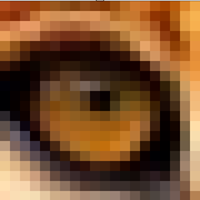

In [4]:
print("Figure 2. Lion's Eye")
from IPython.display import Image, display
display(Image(filename='images/lions_eye.png', embed=True))

The dots making up the image are called <i>pixels</i>. Technically speaking, a pixel (or picture element) is the smallest addressable element in a <i>raster image</i>. In computing, raster images are <i>bitmaps</i>. A bitmap image is a rectangular grid of square-shaped pixels. Each pixel has an addressable position within the image and a particular 'color' specified by a number of bits. In our case, the way in which the position is specified depends on the particular Python libraries being used to do the processing and the way in which the color is displayed and interpreted depends on the particular color model being used.

<a class="anchor" id="Coordinate"></a>
<h3>2. Coordinate Systems</h3>
<a href='#toc'>Return to TOC</a>

In geometry, a coordinate system is a system that uses one or more numbers, or coordinates, to uniquely determine the position of the points in a defined space. The order of the coordinates is significant, and they are sometimes identified by their position in an ordered tuple and sometimes by a letter, as in "x" and "y" coordinates. The coordinates are taken to be real numbers in elementary mathematics. 

<a class="anchor" id="Cartesian"></a>
<h4>2.1 Cartesian Coordinates</h4>
<a href='#toc'>Return to TOC</a>

The prototypical coordinate system is the <i>Cartesian</i>. In this sort of system, "each point is uniquely specified by a pair of numerical coordinates, which are the signed distances to the point from two fixed perpendicular oriented lines, measured in the same unit of length." An example of such a system is shown in Figure 3. In this figure there are two perpendicular axes "x" and "y." The origin of this system is denoted (0,0). Distances from the origin to the right and up are positive and those to the left or down are negative. In this system, points can be denoted by a tuple (x,y) where x stands for the distance of the point from 0 on the horizontal or "x" axis and y stands for the distance of the point from 0 on the vertical or "y" axis. So, for instance, in Figure 3 the point designated (2,3) is a positive distance of 2 from the origin on the x-axis and 3 is a positive distance of 3 from the origin on the y-axis. Similarly, the point (-3,1) is a negative distance of -3 from the origin on the x-axis and a positive distance of 1 from the origin on the y-axis.

Figure 3. Cartesian Coordinates (Source: Wikipedia


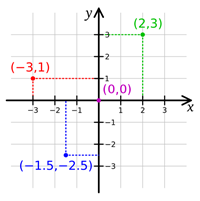

In [5]:
print("Figure 3. Cartesian Coordinates (Source: Wikipedia")
from IPython.display import Image, display
display(Image(filename='images/cartesian_coords_small.png', embed=True))

<a class="anchor" id="PythonCoord"></a>
<h4>2.2 Python Image Coordinate Systems</h4>
<a href='#toc'>Return to TOC</a>

As noted, an image in Python (and many other programming languages) is a grid of rows and columns of pixels. The position of each pixel in the grid is denoted by a tuple (r, c) where 'r' is the row of the pixel and 'c is the column of the pixel. The numbering of the rows and columns each start with 0 (i.e. zero-based). Assuming that there are 'n' rows and 'm" columns, the last row of the grid would be 'n-1' while the last column would be 'm-1'. Thus, the pixels in the corners of the grid/image are designated as:

<ul>
    <li>top-left - (0,0)</li>
    <li>top-right - (0,m-1)</li>
    <li>bottom-left - (n-1,0)</li>
    <li>bottom-right - (n-1, m-1)</li>
</ul>

These notations, as well as the layout and direction of the axes, are illustrated in Figure 4.

Figure 4. Python Image Coordinates


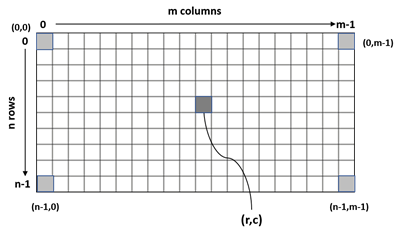

In [6]:
print("Figure 4. Python Image Coordinates")
from IPython.display import Image, display
display(Image(filename='images/skimg_coord_sys_small.png', embed=True))

When comparing Figure 4 with Figure 3, it's important to remember some key differences:

<ol>
    <li>The Python language is zero indexed.</li>
    <li>The origin starts in the top-left corner of the image and increases as we move to the right and down.</li>
    <li>Finally, specifying the location of each pixel as (r,c) reverses the traditional roles of the x and y axes. In the Cartesian system, points are usually specified as (x,y) where x-axis is horizontal and the y-axis vertical. However, in a Python image the rows represent the vertical or y-axis and the columns represent the horizontal or x-axis. So, strictly speaking each tuple in an image is designated as (y,x).</li>
</ol>

<a class="anchor" id="Libraries"></a>
<h4>2.3 Exploring the Coordinate System with Python Image Processing Libraries</h4>
<a href='#toc'>Return to TOC</a>

To see how this coordinate system works in practice, let's considered how it is manifested in two of the more frequently used Python image processing libraries -- sckit-image and OpenCV. In a nutshell:

<ul>
    <li><b>sckit-image</b> -- (a.ka. skimage) is an open-source image processing library for the Python programming language. It includes algorithms for segmentation, geometric transformations, color space manipulation, analysis, filtering, morphology, feature detection, and more. It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. </li><br\>
    <li><b>OpenCV</b> -- is an open-source library that was developed by Intel in the year 2000. It is mostly used in computer vision tasks such as object detection, face detection, face recognition, image segmentation, etc but also contains a lot of useful functions that you may need in ML.</li>
</ul>

The two code entries that following, illustrate how to use these libraries to read and display the lion image shown in Figure 1 and how to access the underlying structure and coordinates of the image.

In [7]:
# common libraries used by both image libraries

# The Python 'os' module 'provides functions for interacting with the operating system'
# Here we'll use it to determine the current working directory
import os

# Matplotlib will be employed to display the image
from matplotlib import pyplot as plt

# Finally, the name and path of theimage file containing the lion.png file
# which we'll use with both image libraries
imgFile = os.getcwd() + '\images\lion.jpg'

Data type of img created by skimage io: <class 'numpy.ndarray'> 
Display of Lion.png using skimage io and matplotlib


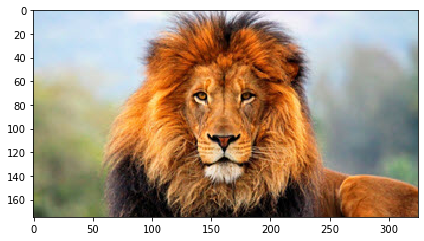

In [8]:
# The sckit-image library (or package)
# 'io' is subpackage used for 'reading, saving, and displaying images and video'
import skimage
import skimage.io as skio

# read the image
img_sk = skio.imread(imgFile)
print("Data type of img created by skimage io: {} ".format(type(img_sk)))

# display the image in the notebook vs. separate window
print('Display of Lion.png using skimage io and matplotlib')
skio.imshow(img_sk)



In [9]:
# some of the key elements of the image coordinate system
# employed by the skimage library

img_sk_height = img_sk.shape[0] # number of rows
img_sk_width = img_sk.shape[1] # number of cols
img_sk_channels = img_sk.shape[2] # number of channels
tot_sk_pixels = img_sk_height * img_sk_width

print("Shape of img_sk {}".format(img_sk.shape))
print("Height of img_sk: {} pixels".format(img_sk_height))
print("Width of img_sk: {} pixels".format(img_sk_width))
print("Channels of img_sk: {}".format(img_sk_channels))
print("Total Pixels in img_sk: {}".format(tot_sk_pixels))

Shape of img_sk (175, 325, 3)
Height of img_sk: 175 pixels
Width of img_sk: 325 pixels
Channels of img_sk: 3
Total Pixels in img_sk: 56875


In [10]:
# the opencv image library is actually designated by 'cv2' not 'opencv'.
# the '2' on the end of 'cv2' refers to the version of the library.

import cv2

# both cv2 and skimage have an 'imread' method to read the image file
# this is the same lion.png file used above
img_cv2 = cv2.imread(imgFile)
print("Data type of img created by cv2 {}".format(type(img_cv2)))

Data type of img created by cv2 <class 'numpy.ndarray'>


In [11]:
# the same code used to display key elements of the image produced by skimage
# can be used with cv2, but the results are slightly different

img_cv2_height = img_cv2.shape[0] # number of rows
img_cv2_width = img_cv2.shape[1] # number of cols
img_cv2_channels = img_cv2.shape[2] # number of channels
tot_cv2_pixels = img_cv2_height * img_cv2_width

print("Shape of img_cv2 {}".format(img_cv2.shape))
print("Height of img_cv2: {} pixels".format(img_cv2_height))
print("Width of img_cv2: {} pixels".format(img_cv2_width))
print("Channels of img_cv2: {}".format(img_cv2_channels))
print("Total Pixels in img_cv2: {}".format(tot_cv2_pixels))

Shape of img_cv2 (175, 325, 3)
Height of img_cv2: 175 pixels
Width of img_cv2: 325 pixels
Channels of img_cv2: 3
Total Pixels in img_cv2: 56875


<a class="anchor" id="Color"></a>
<h3>3. Color Models</h3>
<a href='#toc'>Return to TOC</a>

One thing that 'skimage' and 'cv2' share in common is that images as numpy arrays, a well known data structure. This means that many of the methods or functions that can be used with an numpy array can be used with these image representations (whether they all make sense is different story). This is why the basic structure of the image can be explored with the '.shape' method. Similarly, if we want to know the value for any given pixel, we can simply use numpy notation to pinpoint a particular element in a 2D array. Take, for example, the corners of the image. As shown below, the values of the pixels in the upper-left and lower-right corners for the two libraries are:

In [12]:
# upper-left(ul) for 'skimage' and 'cv2'
ul_sk = img_sk[0][0]
ul_cv2 = img_cv2[0][0]
# lower-right(rl) for 'skimage' and 'cv2'
# remember zero-indexing, thus we substract -1 from the position of the farthest pixel
lr_sk = img_sk[img_sk_height-1][img_sk_width-1] 
lr_cv2 = img_cv2[img_cv2_height-1][img_cv2_width-1]

print("Value in upper-left corner in img_sk: {}".format(ul_sk))
print("Value in upper-left corner in img_cv2: {}\n".format(ul_cv2))

print("Value in lower-right corner in img_sk: {}".format(lr_sk))
print("Value in lower-right corner in img_cv2: {}".format(lr_cv2))

Value in upper-left corner in img_sk: [189 216 237]
Value in upper-left corner in img_cv2: [237 216 189]

Value in lower-right corner in img_sk: [120  73  31]
Value in lower-right corner in img_cv2: [ 31  73 120]


With both libraries, the resulting values for these or any other positions or pixels in the image are arrays (of integers) instead of single values. However, while they are both arrays, the order of the values in the arrays are reversed. For instance, in the upper-left it's \[189 216 237\] versus \[237 216 189\]. The reason for the difference is that the two libraries use different color models or color spaces by default.  

A <i>color model</i> is 'an abstract mathematical model that describes how colors can be represented as a set of numbers' (here the numbers are 8-bit integers in an array). In the case of 'skimage', the color model is <i>RGB</i> (standing for 'red, green, blue'). In this model, the three primary colors are combined together to create colors ranging from completely completely black (0, 0, 0) to completely white (255, 255, 255). Thus, the color of the pixel at img_sk\[0\]\[0\] (also denoted by img_sk\[0,0\]) is a combination of a red value of 189, a green value 216, and blue value of 237. In contrast, the color model for 'cv2' is the reverse, i.e. <i>BGR</i>. If by some mistake you used skimage io to show the 'cv2' version of the 'lion' image, you'd end up with an interesting image, but obviously it's not quite the right color scheme.

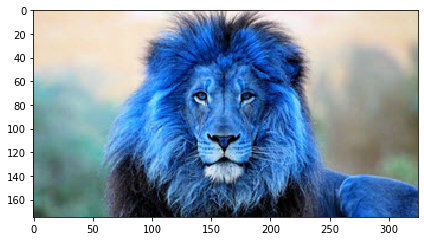

In [13]:
skio.imshow(img_cv2)

<a class="anchor" id="LibColor"></a>
<h4>3.1 'skimage' and 'cv2' Color Models</h4>
<a href='#toc'>Return to TOC</a>

Both the 'skimage' and 'cv2' libraries support a number of different color models or spaces. 'skimage' supports ~10 different models and 'cv2' ~15. For this reason, as well as others, they both provide the means to convert from one color model or space to another. The conversion methods for each are: 

<ul>
    <li>skimage.color.convert_colorspace(arr, fromspace, tospace) -- where 'arr' is the image and the valid color spaces are: ‘RGB’, ‘HSV’, ‘RGB CIE’, ‘XYZ’, ‘YUV’, ‘YIQ’, ‘YPbPr’, ‘YCbCr’, ‘YDbDr’ </li><br\>
    <li>cv2.cvtColor(input_image, flag) -- where the 'input_img' is an array and the 'flag' is an integer code from a long list of flags too numerous to list (see the following source for the integer codes https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html) </li>
</ul>

This conversion enables the libraries to not only mix and match the spaces but also to support images produced by different libraries. A simple example of this is using 'skimage io' to display a 'cv2' image within a Jupyter notebook. With 'skimage io' the cv2 image will appear in a notebook cell. However, when matplotlib is used to display the same image, it ends up in a separate window which will eventually have to be closed. 
    
In order to use 'skimage io' with 'cv2,' the image model has to be converted from BRG to RBG. This can be done in a couple of ways. First, you could convert the 'cv2' image from BGR to RGB with cvtColor method. Second, you could convert the 'cv2' image by simpy reversing the order of B and R channels in the image array (i.e. img_cv2[:, :, ::-1]). Once either is done you can call 'skio.imshow' to display the image.

CV2 Image Converted to RGB with 'cvtColor' Method


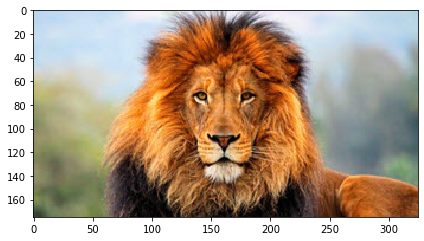

In [14]:
print("CV2 Image Converted to RGB with 'cvtColor' Method")

img_converted_BGR2RGB = cv2.cvtColor(img_cv2,4)  # 4 is the index for the cvtColor flag converting BGR to RGB
skio.imshow(img_converted_BGR2RGB)

CV2 Image Converted to RGB by reversing the order of the B and G channels:


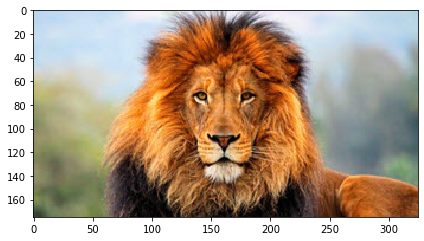

In [15]:
print("CV2 Image Converted to RGB by reversing the order of the B and G channels:")

img_reverse_BGR2RGB = img_cv2[:, :, ::-1]
skio.imshow(img_reverse_BGR2RGB)

In [16]:
print("Upper-left corner of 'skimage' image: {} \n".format(img_sk[0][0]))
print("Upper-left corner of 'cv2' image before adjustment: {}".format(img_cv2[0][0]))
print("Upper-left corner of 'cv2' image after conversion: {}".format(img_converted_BGR2RGB[0][0]))
print("Upper-left corner of 'cv2' image after array modification: {}".format(img_reverse_BGR2RGB[0][0]))

Upper-left corner of 'skimage' image: [189 216 237] 

Upper-left corner of 'cv2' image before adjustment: [237 216 189]
Upper-left corner of 'cv2' image after conversion: [189 216 237]
Upper-left corner of 'cv2' image after array modification: [189 216 237]


<a class="anchor" id="DispColorChannels"></a>
<h4>3.2 Displaying the Color Channels</h4>
<a href='#toc'>Return to TOC</a>

As we have seen, images have 1 or more color channels depending on the color model or space. With RGB, the number of channels is obviously 3 (R, G, B). These 3 channels are combined to produce the multi-colored pixels that appears in the image. It's possible to display each of these channels separately by essentially 'zeroing' out the other two channels. For the red channel the pixels (0) we'd zero out the green and blue channels. We can view the green(1) and blue(2) channels in the same fashion. This is done in the 3 images that follow. 

Display of Red Channel(0) for cv2 image 'img_reverse_BGR2RGB'

Shape of red_image: (175, 325, 3)
Value of upper-left corner: [189   0   0]
Value of lower-left corner: [69  0  0]
Value of upper-right corner: [178   0   0]
Value of lower-right corner: [120   0   0]


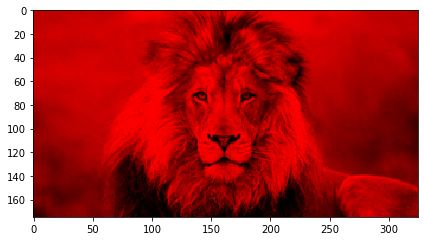

In [17]:
print("Display of Red Channel(0) for cv2 image 'img_reverse_BGR2RGB'\n")

red_image = img_reverse_BGR2RGB.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

print('Shape of red_image: {}'.format(red_image.shape))
print('Value of upper-left corner: {}'.format(red_image[0,0]))
print('Value of lower-left corner: {}'.format(red_image[red_image.shape[0]-1,0]))
print('Value of upper-right corner: {}'.format(red_image[0,red_image.shape[1]-1]))
print('Value of lower-right corner: {}'.format(red_image[red_image.shape[0]-1,red_image.shape[1]-1]))
skio.imshow(red_image)

Display of Green Channel(1) for cv2 image 'img_reverse_BGR2RGB'

Value of upper-left corner: [  0 216   0]
Value of lower-left corner: [ 0 73  0]
Value of upper-right corner: [  0 210   0]
Value of lower-right corner: [ 0 73  0]


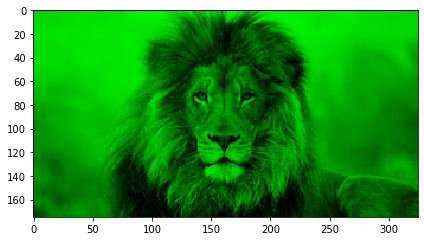

In [18]:
print("Display of Green Channel(1) for cv2 image 'img_reverse_BGR2RGB'\n")

green_image = img_reverse_BGR2RGB.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

print('Value of upper-left corner: {}'.format(green_image[0,0]))
print('Value of lower-left corner: {}'.format(green_image[green_image.shape[0]-1,0]))
print('Value of upper-right corner: {}'.format(green_image[0,green_image.shape[1]-1]))
print('Value of lower-right corner: {}'.format(green_image[green_image.shape[0]-1,green_image.shape[1]-1]))

skio.imshow(green_image) 

Display of Blue Channel(2) for cv2 image 'img_reverse_BGR2RGB'

Value of upper-left corner: [  0   0 237]
Value of lower-left corner: [ 0  0 58]
Value of upper-right corner: [  0   0 225]
Value of lower-right corner: [ 0  0 31]


C:\anaconda4\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


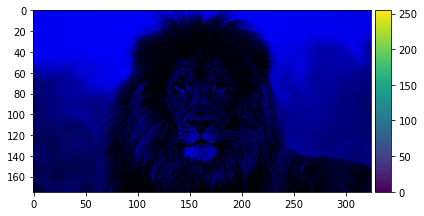

In [19]:
print("Display of Blue Channel(2) for cv2 image 'img_reverse_BGR2RGB'\n")

blue_image = img_reverse_BGR2RGB.copy()

blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

print('Value of upper-left corner: {}'.format(blue_image[0,0]))
print('Value of lower-left corner: {}'.format(blue_image[blue_image.shape[0]-1,0]))
print('Value of upper-right corner: {}'.format(blue_image[0,blue_image.shape[1]-1]))
print('Value of lower-right corner: {}'.format(blue_image[blue_image.shape[0]-1,blue_image.shape[1]-1]))

skio.imshow(blue_image)

<a class="anchor" id="CombColorChannels"></a>
<h4>3.3 Combining Color Channels</h4>
<a href='#toc'>Return to TOC</a>

Figure 5 below illustrates how the 3 RGB channel values at a given (r,c) position are combined to produce the color that actually appears in the image at that position. Each of the channels uses an 8-bits binary to represent the integers in the range of 0-255. The three 8-bit binaries are combined into a 24-bit binary using the formula:  

    pixel_24_bits = R*256*256 + G*256 + B
   
So, for example, in the case of the RGB lion image, the RGB color of the upper-left corner of the image is:

    red_channel   = 189*256*256  = 12386304 = #BD 00 00 (hex) = 0b101111010000000000000000
    green_channel =     217*256  =    55552 = #00 D9 00 (hex) = 0b000000001101100100000000
    blue_channel  =         237  =      237 = #00 00 ED (hex) = 0b000000000000000011101101
    RGB =         = rc + gc + bc = 12442093 = #BD D9 ED (hex) = 0b101111011101100111101101

which turns out to be a shade of light blue (which you can easily find online at any number of the existing RGB color pickers). 

<img src="http://localhost:8888/tree/Computer_Image_Processing_and_Vision/images/color_channels_equation.png" width=500 height =300  align="left"/>
<p style="clear:left">Figure 5. From RGB Channels to Pixels</p>
<p></p>

Figure 5. Combining RGB Color Channels to a Single Image


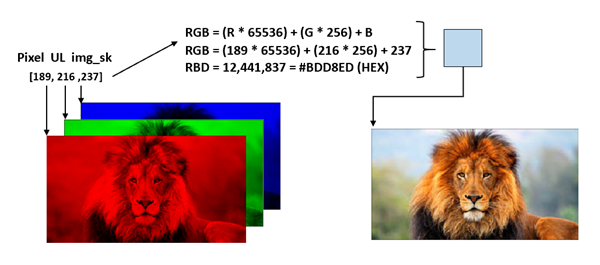

In [20]:
print("Figure 5. Combining RGB Color Channels to a Single Image")
from IPython.display import Image, display
display(Image(filename='images/color_channels_equation_small.png', embed=True))

<a class="anchor" id="GrayScale"></a>
<h4>3.4 Converting RGB (color) Images to Grayscale Images</h4>
<a href='#toc'>Return to TOC</a>

One conversion that is often used is converting an RGB (colored) image to a grayscale image. Essentially, this eliminates the 'hue' and 'saturation' of a color while retaining its luminance (brightness). This simplifies the structure of the array so that there is no channel dimension. This reduces the number of integers (or reals) needed to represent the color from three to one. In turn this simplifies many processing algorithms and reduces computational requirements and complexity.

With 'skimage' there is a separate method ('rgb2gray' from the skimage.color subpackage) that can be used to carry out the conversion. In cv2 it's one of the cvtColor conversion alternatives. However, they basically compute the grayscale value by taking the average of the R, G and B channel values. The following illustrates the conversion process using 'skimage'.

Converting RGB image to Grayscale using 'skimage'
Shape of img_sk_gray: (175, 325)


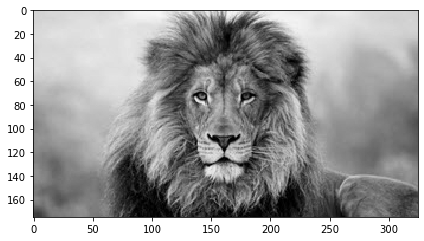

In [21]:
print("Converting RGB image to Grayscale using 'skimage'")

from skimage.color import rgb2gray # there's also an rgb2grey method
img_sk_gray = rgb2gray(img_sk)
print('Shape of img_sk_gray: {}'.format(img_sk_gray.shape))
skio.imshow(img_sk_gray)

Looking at the 'shape' of the grayscale image (above), we can see that the channel dimension has been eliminated. This means that only one number is used to describe the color or in this case luminance of a pixel. Looking at the value for the upper-left corner (img_sk_gray\[0,0\]), we see that it is no longer an integer but a (64-bit) floating point number equal to ~0.85. Since it is a floating point number, the theoretical min and max values are no longer 0 and 255 but 0.0 (black) and 1.0 (white), respectively. Since this is an numpy ndarray, we can easily calculate the actual min and max values which turn out to be 0.0 and ~.976. If an integer representation is required, it's easy to convert the floating point to an the integer value by multiplying the floating point value * 255.0, rounding the value, and then converting the value to an 'int'.  

In [22]:
import numpy as np

print("Type of img_sk_gray:",type(img_sk_gray))
print("Shape of grayscale image: {}".format(img_sk_gray.shape))
print("Number of pixels in grayscale image {} \n".format(img_sk_gray.shape[0]*img_sk_gray.shape[1]))

ul_sk_gray = img_sk_gray[0,0]
print("Type of value in upper-left corner: {}".format(type(ul_sk_gray)))
print("Value of the upper-left corner: {}".format(ul_sk_gray))
print("Value of the upper-left corner as integer: {}\n".format(int(ul_sk_gray * 255.0)))
      
print("Max value of img_sk_gray:",np.max(img_sk_gray))
print("Min value of img_sk_gray:",np.min(img_sk_gray))

Type of img_sk_gray: <class 'numpy.ndarray'>
Shape of grayscale image: (175, 325)
Number of pixels in grayscale image 56875 

Type of value in upper-left corner: <class 'numpy.float64'>
Value of the upper-left corner: 0.8304964705882353
Value of the upper-left corner as integer: 211

Max value of img_sk_gray: 0.9758894117647059
Min value of img_sk_gray: 0.0


<a class="anchor" id="BW"></a>
<h4>3.5 Converting Color or Grayscale Images to Black and White (binary)</h4>
<a href='#toc'>Return to TOC</a>

<i>Thresholding</i> is a type of image processing (technically 'segmentation') where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from color or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with. For example, in the image of the lion we've been exploring, our interest might be in the lion, ignoring the background.

While we'll look at more sophisticated thresholding later, in this example we'll simply select a single value for a threshold then set all the values in the grayscale lion image equal to or above the threshold to 1.0 (white) and all those below to 0.0 (black). When this is done, most of the background should be eliminated, leaving the 'lion' for further investigation. Of course, this is very crude and can be substantially improved with more sophisticated thresholding techniques.

Verify that thresholding has worked
Sample converted value in upper-left corner of img_sk_bw: 1.0
Sample converted value in bottom-center of img_sk_bw: 0.0

Black and white Image of Lion using 1st Quartile as Threshold


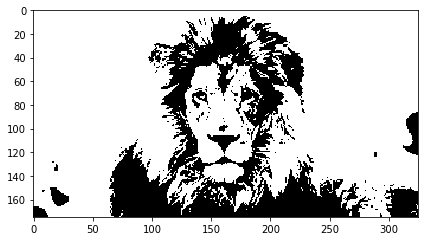

In [23]:
threshold = np.quantile(img_sk_gray,.25) # .25 quantile is the 1st quartile

img_sk_bw = np.copy(img_sk_gray)
img_sk_bw[img_sk_bw >= threshold] = 1.0
img_sk_bw[img_sk_bw < threshold] = 0.0

print("Verify that thresholding has worked")
print("Sample converted value in upper-left corner of img_sk_bw: {}".format(img_sk_bw[0,0]))
print("Sample converted value in bottom-center of img_sk_bw: {}\n".format(img_sk_bw[174,100]))

print("Black and white Image of Lion using 1st Quartile as Threshold")
skio.imshow(img_sk_bw)

<a class="anchor" id="Invert"></a>
<h4>3.6 Inverting from Black on White to White on Black</h4>
<a href='#toc'>Return to TOC</a>

For some reason (unknown to me), creating a white on black image using the above threshhold does not seem to work in skimage
An alternative is the 'invert' method in the skimage 'util' subpackage. As the name implies, it simply shifts the 0s and 1s of the black on white image to a white on black image. 

White and Black Image of Lion using 1st Quartile as Threshold


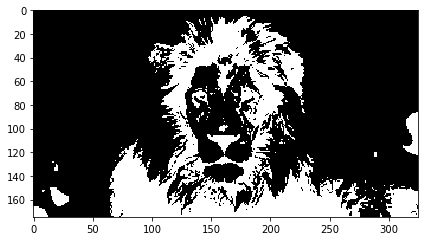

In [24]:
from skimage.util import invert
img_sk_wb = skimage.util.invert(img_sk_bw)

print("White and Black Image of Lion using 1st Quartile as Threshold")
skio.imshow(img_sk_wb)

Most Python image processing libraries provide more extensive 'threshold' methods. We'll delve into this topic in more detail later when we examine image segmentation.

<a class="anchor" id="ImgDisk"></a>
<h3>4. Saving an Image to Disk</h3>
<a href='#toc'>Return to TOC</a>

When you 'save' an image to disk, you need to specify its file format. Two of the most popular are PNG and JPG(JPEG). Some of the other possible formats include: BMP (8-bit, 24-bit, 32-bit), GIF, PPM, PNM, and TIFF. Since our focus is on what transpires after we've read an image file and the fact that the python image libraries will automatically convert the image to a numpy array on reading, we'll stick with one file format -- PNG -- in saving our images for external purposes.

For the 'cv2' library the method that is use to save a file is:

    cv2.imwrite('file_path_name', 'image_to_be_saved')
    
and for the 'skimage io' library it's:

    skio.imwrite('file_path_name', 'image_to_be_saved')

In both cases the image can be an MxN, MxNx3, or MxNx4 array.


In [25]:
# first convert img_sk_gray which is float to unsigned 8-bit integer
img_sk_gray_int = img_sk_gray.copy() * 255.0
img_sk_gray_int = img_sk_gray_int.astype(np.uint8)

img_sk_file = os.getcwd() + '\images\img_sk_gray' + '.png'
skio.imsave(img_sk_file, img_sk_gray_int)

print("Converted 'img_sk_gray' image to integer, then stored {} on disk with skio imsave".format(img_sk_file))

Converted 'img_sk_gray' image to integer, then stored c:\Jupyter_Files\Computer_Image_Processing_and_Vision\images\img_sk_gray.png on disk with skio imsave


In [26]:
#convert RBG image to BRG image which is the format for 'cv2'
img_red_file = os.getcwd() + '\images\img_red' + '.png'
cv2.imwrite(img_red_file, cv2.cvtColor(red_image, cv2.COLOR_RGB2BGR))

print("Converted RGB array 'red_image' to BGR, then stored {} on disk with skio imsave".format(img_red_file))

True

Converted RGB array 'red_image' to BGR, then stored c:\Jupyter_Files\Computer_Image_Processing_and_Vision\images\img_red.png on disk with skio imsave
